In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [2]:
my_data_dir = 'D:\TF_2_Notebooks_and_Data\cell_images'

In [3]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['test', 'train']

In [4]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [5]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [6]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [7]:
os.listdir(train_path+'\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [8]:
para_cell = train_path+'\\parasitized'+'\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [9]:
para_img= imread(para_cell)

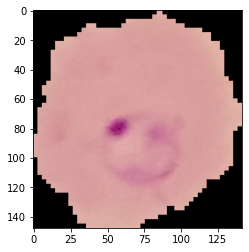

In [10]:
plt.imshow(para_img)

In [11]:
para_img.shape

(148, 142, 3)

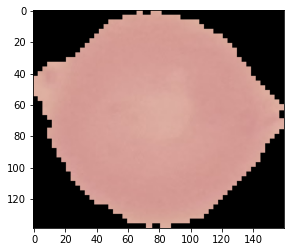

In [12]:
unifected_cell_path = train_path+'\\uninfected\\'+os.listdir(train_path+'\\uninfected')[0]
unifected_cell = imread(unifected_cell_path)
plt.imshow(unifected_cell)

In [13]:
# how many images there are
len(os.listdir(train_path+'\\parasitized'))

12480

In [14]:
# how many images there are
len(os.listdir(train_path+'\\uninfected'))

12480

In [15]:
unifected_cell.shape

(139, 160, 3)

In [16]:
para_img.shape

(148, 142, 3)

In [17]:
# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
#All the images are of different dimension and all the images have 3 color channels RGB. So here dim1 has the 1st dimension 
#of the shape same with dim2 it has the 2nd dim of the image and the loop is used to run through all the images and then append 
#the dimensions into the list
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


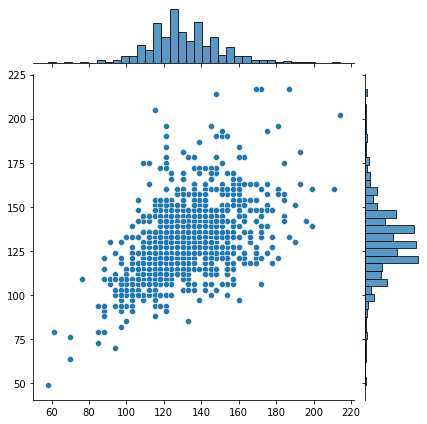

In [18]:
sns.jointplot(dim1,dim2)

In [19]:
np.mean(dim1)

130.92538461538462

In [20]:
np.mean(dim2)

130.75

In [21]:
image_shape = (130,130,3)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |  Deprecated: `tf.keras.preprocessing.image.ImageDataGenerator` is not
 |  recommended for new code. Prefer loading images with
 |  `tf.keras.utils.image_dataset_from_directory` and transforming the output
 |  `tf.data.Dataset` with preprocessing layers. For more informati

In [24]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

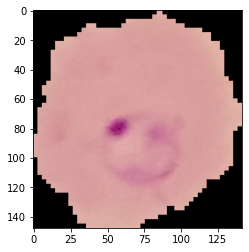

In [25]:
plt.imshow(para_img)

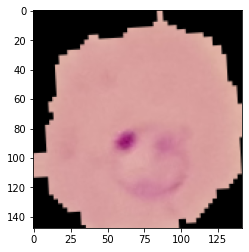

In [26]:
plt.imshow(image_gen.random_transform(para_img))

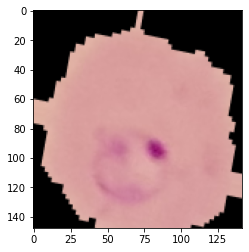

In [27]:
plt.imshow(image_gen.random_transform(para_img))

In [28]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [29]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# Creating the Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [46]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)      

## Early Stopping

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Training the Model

In [35]:
#help(image_gen.flow_from_directory)

In [36]:
batch_size = 16

In [37]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [39]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [40]:
train_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [41]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [42]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
results = model.fit(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 246s 158ms/step - loss: 0.2999 - accuracy: 0.8824 - val_loss: 0.2367 - val_accuracy: 0.9208
Epoch 2/20
1560/1560 [==============================] - 262s 168ms/step - loss: 0.1850 - accuracy: 0.9425 - val_loss: 0.1667 - val_accuracy: 0.9419
Epoch 3/20
1560/1560 [==============================] - 245s 157ms/step - loss: 0.1700 - accuracy: 0.9468 - val_loss: 0.1650 - val_accuracy: 0.9450
Epoch 4/20
1560/1560 [==============================] - 242s 155ms/step - loss: 0.1617 - accuracy: 0.9497 - val_loss: 0.1599 - val_accuracy: 0.9458
Epoch 5/20
1560/1560 [==============================] - 242s 155ms/step - loss: 0.1596 - accuracy: 0.9500 - val_loss: 0.1669 - val_accuracy: 0.9435
Epoch 6/20
1560/1560 [==============================] - 242s 155ms/step - loss: 0.1538 - accuracy: 0.9504 - val_loss: 0.1547 - val_accuracy: 0.9450
Epoch 7/20
1560/1560 [==============================] - 251s 161ms/step - loss: 0.1563 - accuracy: 0.9511 - val_

In [49]:
from tensorflow.keras.models import load_model
model.save('malaria_detector_3.h5')

# Evaluating the Model

In [50]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

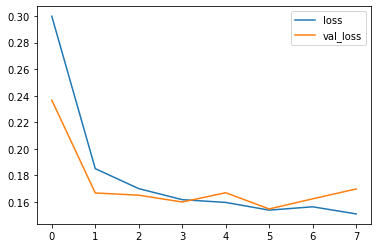

In [51]:
losses[['loss','val_loss']].plot()

In [52]:
model.metrics_names

['loss', 'accuracy']

In [53]:
model.evaluate(test_image_gen)

163/163 [==============================] - 12s 73ms/step - loss: 0.1616 - accuracy: 0.9473


[0.16163945198059082, 0.9473077058792114]

In [54]:
from tensorflow.keras.preprocessing import image

In [55]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict(test_image_gen)

163/163 [==============================] - 13s 77ms/step


In [56]:
pred_probabilities

array([[1.8564206e-06],
       [5.2967989e-05],
       [1.9289260e-05],
       ...,
       [9.6075696e-01],
       [9.9071985e-01],
       [9.8461431e-01]], dtype=float32)

In [57]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [58]:
predictions = pred_probabilities > 0.5

In [59]:
# Numpy can treat this as True/False for us
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [60]:
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1300
           1       0.93      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [62]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1211,   89],
       [  47, 1253]], dtype=int64)

# Predicting on an Image

In [63]:
# Your file path will be different!
para_cell

'D:\\TF_2_Notebooks_and_Data\\cell_images\\train\\\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [64]:
my_image = image.load_img(para_cell,target_size=image_shape)

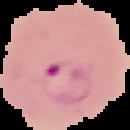

In [65]:
my_image

In [66]:
type(my_image)

PIL.Image.Image

In [67]:
my_image = image.img_to_array(my_image)

In [68]:
type(my_image)

numpy.ndarray

In [69]:
my_image.shape

(130, 130, 3)

In [70]:
my_image = np.expand_dims(my_image, axis=0)

In [71]:
my_image.shape

(1, 130, 130, 3)

In [72]:
model.predict(my_image)

1/1 [==============================] - 0s 70ms/step


array([[0.]], dtype=float32)

In [73]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [74]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}